# Core Functions
> Summary description here. 

In [220]:
#hide
# default_exp core
from nbdev.showdoc import *
%reload_ext autoreload
%autoreload 2
%matplotlib inline
try:
    from  cellsegment.core import *  # hide from itself
except:
    pass

In [221]:
# export

import cv2
from fastai.vision import *
import os

In [222]:
# export
TEST_PATH = 'nbs_test_data'
TEST_JPG = 'nbs_test_data/235443 - 1.jpg'
TEST_PNG = 'nbs_test_data/235443 - 1.png'
TEST_JSON = 'nbs_test_data/235443 - 1.json'
TEST_CSV= 'nbs_test_data/235443 - 1.jpg.points.csv'

In [223]:
# export
def progress_bar(i,n):
    print(':', end='')
    if i % n == 0:
        print(' ', i)
        

In [224]:
# export
import csv
def resize_file(fn, scale=1):
    img = PIL.Image.open(fn)
    img_w, img_h = img.size
    img_w, img_h = int(img_w*scale), int(img_h*scale)
    return img.resize((img_w, img_h))
        

In [225]:
#export
def in_ipython():
    "Check if the code is running in the ipython environment (jupyter including)"
    program_name = os.path.basename(os.getenv('_', ''))
    if ('jupyter-notebook' in program_name or # jupyter-notebook
        'ipython'          in program_name or # ipython
        'JPY_PARENT_PID'   in os.environ):    # ipython-notebook
        return True
    else:
        return False

IN_IPYTHON = in_ipython()

#export
def in_colab():
    "Check if the code is running in Google Colaboratory"
    try:
        from google import colab
        return True
    except: return False

IN_COLAB = in_colab()

#export
def in_notebook():
    "Check if the code is running in a jupyter notebook"
    if in_colab(): return True
    try:
        shell = get_ipython().__class__.__name__
        if shell == 'ZMQInteractiveShell': return True   # Jupyter notebook, Spyder or qtconsole
        elif shell == 'TerminalInteractiveShell': return False  # Terminal running IPython
        else: return False  # Other type (?)
    except NameError: return False      # Probably standard Python interpreter

IN_NOTEBOOK = in_notebook()

#export
from pynvml import *
def gpu_memory():
    'Print memory total, free and used'
    nvmlInit()
    h = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(h)
    print('*** GPU memory ***')
    print(f'total    : {info.total}')
    print(f'free     : {info.free}')
    print(f'used     : {info.used}')

## Images and Color Maps
* Functions for displaying images and consistant color maps across  
             0-255 int8 scaler data with appliet cmap  
 : 0-1 float32 RGB with label code annotations 0 to 255  
 : images to look the same in matplotlib and in system image viewer  



In [226]:
# export
def np_open_image(fn:str) -> np.ndarray:
    'open an image and return as numpy'
    return  np.asarray(PIL.Image.open(fn))

def cv_open_image(fn:str) -> np.ndarray:
    'open an image and return as numpy'
    return  cv2.imread(fn)




In [227]:
# export
def old_colormap_segmentation_labels(N=256):
    'create a colour map for  segmentation labels'
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    cmap = np.zeros((N, 3))
    for i in range(0, N):
        id = i
        r, g, b = 0, 0, 0
        for j in range(0, 8):
            r = np.bitwise_or(r, (bitget(id, 0) << 7 - j))
            g = np.bitwise_or(g, (bitget(id, 1) << 7 - j))
            b = np.bitwise_or(b, (bitget(id, 2) << 7 - j))
            id = (id >> 3)
        cmap[i, 0] = r
        cmap[i, 1] = g
        cmap[i, 2] = b
    # cmap = cmap.astype(np.float32) / 255
    cmap = cmap.astype(np.uint8).flatten()
    return cmap

In [228]:
# export
from matplotlib.colors import ListedColormap

def generate_colormap_rgb(cmap:str='hot', num_colors:int=256) -> np.ndarray:
    '''
    generate a color map from a matplotlib base
    - cmap: colormap ( use matplotlib cmaps )
    - num_colors:  less than 256, for label images set `num_colors` to the number of colors in the `cmap` colormap 
    '''
    
    assert num_colors > 0 and num_colors <= 256, 'num_colors must be in range 0 to 256'
    cm = plt.get_cmap(cmap)
    pal = cm(np.arange(num_colors))
    xpal = pal.copy()
    for i in range(0,255,num_colors):
        xpal =  np.vstack((xpal, pal))
    xpal[0,:] = (0,0,0,1) # make the first color black
    return (xpal[:256,:3]*255).astype(np.uint8).flatten(), ListedColormap(xpal[:256,:4])

def generate_colormap_rgba(cmap:str='hot', num_colors:int=256) -> ListedColormap:
    '''
    generate a color map from a matplotlib base
    - cmap: colormap ( use matplotlib cmaps )
    - num_colors:  less than 256, for label images set `num_colors` to the number of colors in the `cmap` colormap 
    '''
    
    assert num_colors > 0 and num_colors <= 256, 'num_colors must be in range 0 to 256'
    cm = plt.get_cmap(cmap)
    pal = cm(np.linspace(0, 1, num_colors))
    xpal = pal.copy()
    for i in range(0,255,num_colors):
        xpal =  np.vstack((xpal, pal))
    xpal[0,:] = (0,0,0,1) # make the first color black
    return ListedColormap(xpal[:256,:4])

LABEL_COLORMAP_RGB = generate_colormap_rgb(cmap='tab20', num_colors=20)
LABEL_COLORMAP_RGBA = generate_colormap_rgba(cmap='tab20', num_colors=20)
# generate_colormap(cmap='tab20', num_colors=20).shape

### LABEL_COLORMAP_RGB  & LABEL_COLORMAP_RGBA
> 

In [229]:
# export
LABEL_COLORMAP_RGB, LABEL_COLORMAP_RGBA  = generate_colormap_rgb(cmap='tab20', num_colors=20)
 # = generate_colormap_rgba(cmap='tab20', num_colors=20)

In [230]:
# export
def show_img(im, figsize=None, ax=None, alpha=None, label=None, mode=None, axis_on=False, title=None, cmap=None, vmin=0, vmax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    if mode == 'P':
        cmap = LABEL_COLORMAP_RGBA
        vmax=255
        assert im.dtype == 'uint8', "image type must be uint8 for mode == 'P'"
    ax.imshow(im, alpha=alpha, cmap=cmap, vmin=vmin, vmax=vmax)
    if not axis_on:
        ax.set_axis_off()
    if label: ax.legend()
    if title: ax.set_title(title)
    return ax

In [231]:
# export
def plot_images(img_dict, figsize=None):
    ' plot numpy images side by side'
    fig, axes = plt.subplots(1, len(img_dict), figsize=figsize)
    for i, id in enumerate(img_dict.items()):
        show_img(id[1], ax=axes[i], title=id[0])
    plt.tight_layout()
    

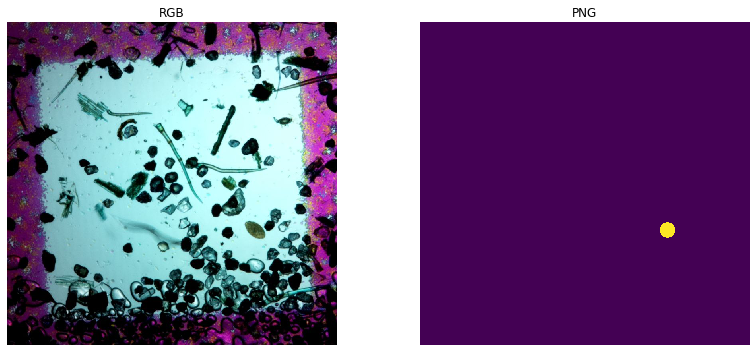

In [232]:
plot_images({'RGB':np_open_image(TEST_JPG), 'PNG':np_open_image(TEST_PNG)}, figsize=(12, 5))

In [233]:
#export
def cmap_show(num=50):
    grd = np.linspace(0, num, num); grd = np.vstack((grd, grd, grd, grd)).astype(np.uint8)
    # show_img(grd[:,:num], cmap=LABEL_COLORMAP_RGBA, vmax=255, axis_on=True)
    show_img(grd, mode='P', axis_on=True)
    plt.tight_layout()

Showing the first 50 colors, which repeat in stepes of 20, with the first black

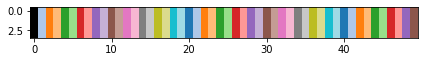

In [234]:
cmap_show() 

Loading and saving greyscale uint8 images with LABEL_COLORMAP_RGB

In [235]:
# export
def save_png_p(img:np.ndarray, fn):
    '''
    Save an image as an 8 bit png file with an embedded LABEL_COLORMAP_RGB
    - img: 
    - fn: filename to save
    - cmap: colormap ( use matplotlib cmaps )
    - num_colors:  less than 256, for label images set `num_colors` to the number of colors in the `cmap` colormap 
    '''
    # palette = generate_colormap(cmap=cmap, num_colors=num_colors)
    img = PIL.Image.fromarray(img, mode='P')
    # img = PIL.Image.fromarray((img*255).astype(np.uint8), mode='P')
    img.putpalette(LABEL_COLORMAP_RGB)
    img.save(fn)


Save test image


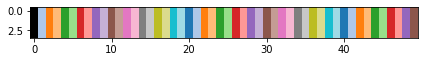

In [236]:
print("Save test image")
grd = np.linspace(0, 50, 50); 
grd = np.vstack((grd, grd, grd, grd)).astype(np.uint8)
show_img(grd, mode='P', axis_on=True)
plt.tight_layout()
# save_png_p(np.resize(grd,(200,200)), 'images/save_png_p_test.png', cmap='hot')
save_png_p(grd, 'images/save_png_p_test.png')

Load test image to compare color maps


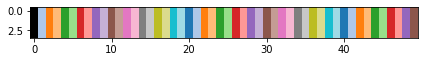

In [237]:
print("Load test image to compare color maps")
img = np_open_image('images/save_png_p_test.png')
show_img(img, mode='P', axis_on=True)
plt.tight_layout()

### A sample of available colour maps

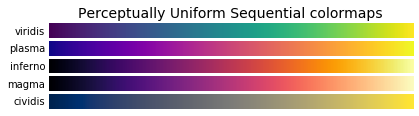

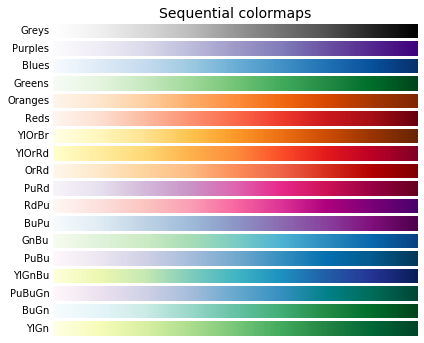

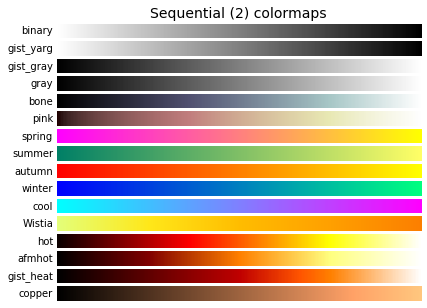

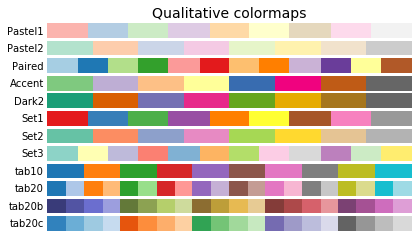

In [238]:
# hide
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c'])]
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows-1)*0.1)*0.22
    fig, axes = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1-.35/figh, bottom=.15/figh, left=0.2, right=0.99)

    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax.text(-.01, .5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()
    

In [239]:
# export
def show_directory_stats(path):    
    print(path)
    
    image_files = get_image_files(path)
    json_files = get_files(path, extensions=['.json'])
    
    for i, fn in enumerate(image_files):
        image_files[i] = fn.name.split('.')[0]
    for i, fn in enumerate(json_files):
        json_files[i] = fn.name.split('.')[0]
        
    print(f'Number of jpg files = {len(image_files)}')
    
    print(f"Number of json files = { len(json_files) }")
    set1 = set(image_files)
    set2 = set(json_files)
    
    missing = list(sorted(set1 - set2))
    added = list(sorted(set2 - set1))
    print('missing:', len(missing), missing)
    print('added:', len(added), added)

In [241]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 20_example_data_prep.ipynb.
Converted 21_example_training_colab.ipynb.
Converted 22_example_markup_images.ipynb.
Converted 23_example_evaluation_inference.ipynb.
Converted 90_core.ipynb.
Converted 91_dataprep_utils.ipynb.
Converted 92_set_directories.ipynb.
Converted 93_inference_utils.ipynb.
Converted 94_json_utils.ipynb.
Converted 96_markup_utilies.ipynb.
Converted 99_histogram_utils.ipynb.
Converted index.ipynb.
